## Cleaning and analyzing Employee Exit Surveys

### Introduction

In this project, we will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Both the TAFE exit survey and the survey for the DETE can be founded [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). Before the start of the analysi, it is necessary to do some minor changes to the datasets including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`).

For the following analysis, we will try to answer the questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Step 1: Reading the datasets

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv', encoding='UTF-8')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='UTF-8')

# Basic information about the datasets
print('DETE Survey Info:\n')
dete_survey.info()
print('TAFE Survey Info:\n')
tafe_survey.info()
print('First DETE rows:', dete_survey.head(5), sep='\n')
print('First TAFE rows:', tafe_survey.head(5), sep='\n')

DETE Survey Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Ph

Below is a preview of a couple columns from the `dete_survey.csv`:

    - ID: An id used to identify the participant of the survey
    - SeparationType: The reason why the person's employment ended
    - Cease Date: The year or month the person's employment ended
    - DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

    - Record ID: An id used to identify the participant of the survey
    - Reason for ceasing employment: The reason why the person's employment ended
    - LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

From the observations of the basic information extracted before, we can infere that there is 822 rows x 56 columns in DETE dataset and 702 rows x 72 columns in TAFE dataset. We can observe that:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they are not represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we do not need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Step 2: Cleaning and modifying the datasets

First, we will try yo handle the values not indicated as NaN and drop all of the columns not needed.

In [2]:
# Update of the datasets
dete_survey = pd.read_csv('dete_survey.csv', encoding='UTF-8', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

After this, we will try to modify column names, because each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we would like to use for our final analysis:

|   dete_survey   |                                  tafe_survey                                 |                        Definition                       |
|:---------------:|:----------------------------------------------------------------------------:|:-------------------------------------------------------:|
| ID              | Record ID                                                                    | An id used to identify the participant of the survey    |
| SeparationType  | Reason for ceasing  employment                                               | The reason why the participant's employment ended       |
| Cease Date      | CESSATION YEAR                                                               | The year or month the participant's employment ended    |
| DETE Start Date |                                                                              | The year the participant began employment with the DETE |
|                 | LengthofServiceOverall.  Overall Length of Service  at Institute (in years)  | The length of the person's employment (in years)        |
| Age             | CurrentAge.  Current Age                                                     | The age of the participant                              |
| Gender          | Gender.  What is your Gender?                                                | The gender of the participant                           |



In [3]:
# Rename of the columns of the datasets
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
tafe_survey_updated.rename(columns = {'Record ID': 'id', 
                                      'CESSATION YEAR': 'cease_date', 
                                      'Reason for ceasing employment': 'separationtype', 
                                      'Gender. What is your Gender?': 'gender',
                                      'CurrentAge. Current Age': 'age',
                                      'Employment Type. Employment Type': 'employment_status',
                                      'Classification. Classification': 'position',
                                      'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                      'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                                     }, inplace=True)
# Check renames
print('DETE columns:', dete_survey_updated.columns, sep='\n')
print('TAFE columns:', tafe_survey_updated.columns, sep='\n')

DETE columns:
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
TAFE columns:
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. 

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

`dete_survey_updated` dataframe contains multiple separation types with the string 'Resignation':

    - Resignation-Other reasons
    - Resignation-Other employer
    - Resignation-Move overseas/interstate

In [4]:
# Check values from separation types
print('DETE separationtype values:', dete_survey_updated['separationtype'].value_counts(), sep='\n')
print('TAFE separationtype values:', tafe_survey_updated['separationtype'].value_counts(), sep='\n')

DETE separationtype values:
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
TAFE separationtype values:
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [5]:
# Create copy of both the datasets for Resignation types
dete_resignations = dete_survey_updated.loc[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | 
                                            (dete_survey_updated['separationtype'] == 'Resignation-Other employer') |
                                            (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate'), :].copy()
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation', :].copy()

# Check values from new datasets
print('DETE separationtype values:', dete_resignations['separationtype'].value_counts(), sep='\n')
print('TAFE separationtype values:', tafe_resignations['separationtype'].value_counts(), sep='\n')

DETE separationtype values:
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
TAFE separationtype values:
Resignation    340
Name: separationtype, dtype: int64


Next we will focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date. Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [6]:
# Check and clean values for DETE
print('DETE cease_date values before:', dete_resignations['cease_date'].value_counts(dropna=False), sep='\n')
pattern_cease_dete = r'([1-2][0-9]{3})'
years = dete_resignations['cease_date'].str.extract(pattern_cease_dete)
dete_resignations['cease_date'] = years
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
print('DETE cease_date values after:', dete_resignations['cease_date'].value_counts(dropna=False), sep='\n')

DETE cease_date values before:
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64
DETE cease_date values after:
 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


DETE cease_date values before:
 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64
DETE dete_start_date values before:
NaN        28
 2011.0    24
 2008.0    22
 2007.0    21
 2012.0    21
 2010.0    17
 2005.0    15
 2004.0    14
 2009.0    13
 2006.0    13
 2013.0    10
 2000.0     9
 1999.0     8
 1998.0     6
 2002.0     6
 1994.0     6
 1996.0     6
 1992.0     6
 2003.0     6
 1980.0     5
 1990.0     5
 1993.0     5
 1997.0     5
 1989.0     4
 1995.0     4
 1988.0     4
 1991.0     4
 2001.0     3
 1986.0     3
 1985.0     3
 1976.0     2
 1983.0     2
 1974.0     2
 1963.0     1
 1972.0     1
 1984.0     1
 1975.0     1
 1973.0     1
 1987.0     1
 1982.0     1
 1971.0     1
 1977.0     1
Name: dete_start_date, dtype: int64
TAFE cease_date values before:
 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64


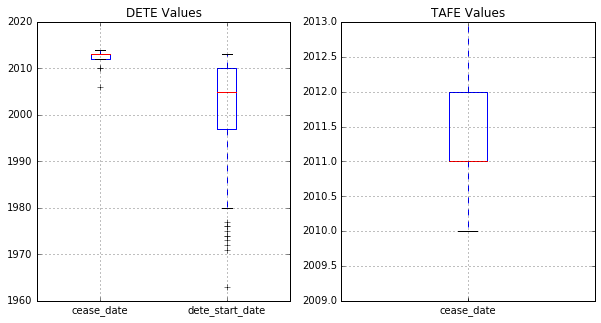

In [7]:
# Check all values for DETE and TAFE
print('DETE cease_date values before:', dete_resignations['cease_date'].value_counts(dropna=False), sep='\n')
print('DETE dete_start_date values before:', dete_resignations['dete_start_date'].value_counts(dropna=False), sep='\n')
print('TAFE cease_date values before:', tafe_resignations['cease_date'].value_counts(dropna=False), sep='\n')
# Visual check
import matplotlib.pyplot as plt
%matplotlib inline
fig_1 = plt.figure(figsize=(10,5))
ax1 = fig_1.add_subplot(1, 2, 1)
ax2 = fig_1.add_subplot(1, 2, 2)
ax1.set_title('DETE Values')
ax2.set_title('TAFE Values')
dete_resignations.boxplot(column=['cease_date', 'dete_start_date'], ax=ax1)
tafe_resignations.boxplot(column=['cease_date'], ax=ax2)
plt.ticklabel_format(useOffset=False, axis='y')
plt.show()

From the results we have obtained we can verify:
- There aren't any major issues with the years.
- The years in each dataframe don't span quite the same number of years.

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service. The `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

In [8]:
# Create new column in DETE for institute_service
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
# Check values for DETE and TAFE service years
print('DETE service years:', dete_resignations['institute_service'].value_counts(dropna=False), sep='\n')
print('TAFE service years:', tafe_resignations['institute_service'].value_counts(dropna=False), sep='\n')

DETE service years:
NaN      38
 5.0     23
 1.0     22
 3.0     20
 0.0     20
 6.0     17
 4.0     16
 9.0     14
 2.0     14
 7.0     13
 13.0     8
 8.0      8
 20.0     7
 15.0     7
 12.0     6
 22.0     6
 17.0     6
 10.0     6
 14.0     6
 16.0     5
 18.0     5
 24.0     4
 23.0     4
 11.0     4
 39.0     3
 32.0     3
 19.0     3
 21.0     3
 36.0     2
 30.0     2
 25.0     2
 28.0     2
 26.0     2
 29.0     1
 42.0     1
 38.0     1
 27.0     1
 41.0     1
 35.0     1
 49.0     1
 34.0     1
 33.0     1
 31.0     1
Name: institute_service, dtype: int64
TAFE service years:
Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


Next, we will identify any employees who resigned because they were dissatisfied.

Below are the columns we will use to categorize employees as "dissatisfied" from each dataframe:

    - tafe_survey_updated:
        - Contributing Factors. Dissatisfaction
        - Contributing Factors. Job Dissatisfaction
    - dete_survey_updated:
        - job_dissatisfaction
        - dissatisfaction_with_the_department
        - physical_work_environment
        - lack_of_recognition
        - lack_of_job_security
        - work_location
        - employment_conditions
        - work_life_balance
        - workload
If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column. This new dissatisfied column will contain just the following values:

    - True: indicates a person resigned because they were dissatisfied with the job
    - False: indicates a person resigned because of a reason other than dissatisfaction with the job
    - NaN: indicates the value is missing

In [9]:
# Create dissatisfaction column for both the datasets
# (1) Check TAFE
print('TAFE Contributing Factors. Dissatisfaction:', tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False), sep='\n')
print('TAFE Job Dissatisfaction:', tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False), sep='\n')

TAFE Contributing Factors. Dissatisfaction:
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
TAFE Job Dissatisfaction:
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [10]:
# (2) Update values in TAFE dissatisfaction columns
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations.loc[:, ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
print('TAFE Contributing Factors. Dissatisfaction:', tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False), sep='\n')
print('TAFE Job Dissatisfaction:', tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False), sep='\n')

TAFE Contributing Factors. Dissatisfaction:
False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
TAFE Job Dissatisfaction:
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [11]:
# (3) Create new column
dete_dissatisfied = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)
tafe_dissatisfied = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up['dissatisfied'] = dete_dissatisfied
tafe_resignations_up['dissatisfied'] = tafe_dissatisfied

# (4) Check results
print('DETE dissatisfied:', dete_resignations_up['dissatisfied'].value_counts(dropna=False), sep='\n')
print('TAFE dissatisfied:', tafe_resignations_up['dissatisfied'].value_counts(dropna=False), sep='\n')

DETE dissatisfied:
False    162
True     149
Name: dissatisfied, dtype: int64
TAFE dissatisfied:
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


Now we are ready to combine our datasets.

In [12]:
# Add column to distinguish between datasets
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combine datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

# Clean unnecessary columns
combined_updated = combined.dropna(axis=1, thresh=500).copy()

# Check results
print('Results of dataset combined and cleaned (in terms of columns):', combined_updated.count(), sep='\n')

Results of dataset combined and cleaned (in terms of columns):
age                  596
cease_date           635
dissatisfied         643
employment_status    597
gender               592
id                   651
institute            651
institute_service    563
position             598
separationtype       651
dtype: int64


Before making the analyse, we have to clean the `institute_service` column (it currently contains values in a couple different forms: individual years and range of years).

To analyze the data, we will convert these numbers into categories. We can base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We will use the slightly modified definitions below:

    - New: Less than 3 years at a company
    - Experienced: 3-6 years at a company
    - Established: 7-10 years at a company
    - Veteran: 11 or more years at a company

In [13]:
# Check service column before
print('Institute Service column before:', combined_updated['institute_service'].value_counts(dropna=False), sep='\n')

Institute Service column before:
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0             

In [14]:
# Modify values
combined_updated.loc[:, ['institute_service']] = combined_updated.loc[:, ['institute_service']].astype(str)
pattern_service = r'([0-9][0-9]?)'
service_years = combined_updated['institute_service'].str.extract(pattern_service)
combined_updated.loc[:, ['institute_service']] = service_years
combined_updated.loc[:, ['institute_service']] = combined_updated.loc[:, ['institute_service']].astype(float)

def define_range(val):
    if pd.isnull(val):
        return np.nan
    elif val >= 11:
        return 'Veteran'
    elif val >= 7:
        return 'Established'
    elif val >= 3:
        return 'Experienced'
    else:
        return 'New'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(define_range)

# Check new column values
print('Institute Service column after:', combined_updated['service_cat'].value_counts(dropna=False), sep='\n')

Institute Service column after:
New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



### Step 3: Analysis of the goal questions

First, we will fill in missing values in the `dissatisfied` column and then aggregate the data.

In [15]:
# Check previous values for dissatisfied column
print('Dissatisfied column before:', combined_updated['dissatisfied'].value_counts(dropna=False), sep='\n')

Dissatisfied column before:
False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


In [16]:
# Fill missing values with most frequent value
values = {'dissatisfied':False}
combined_updated = combined_updated.fillna(value=values)
print('Dissatisfied column after:', combined_updated['dissatisfied'].value_counts(dropna=False), sep='\n')

Dissatisfied column after:
False    411
True     240
Name: dissatisfied, dtype: int64


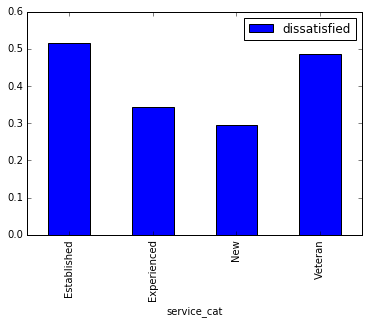

In [17]:
# Perform analysis over service categories values
pv_combined_updated = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.mean)
pv_combined_updated.plot(kind='bar')
plt.show()

Recap one of our goal questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

After the analysis, we can conclude that workers with a short period of time inside the institution were less proned to resign their jobs due to some kind of dissatisfaction. Conversely, near 50% of the workers who worked long periods resign their jobs due to some kind of dissatisfaction with the institution.

To keep with the analysis, it is necessary to decide how to handle the rest of the missing values. Besides, a cleaning of the `age` column can be useful to analyse how many people in each age group resgined due to some kind of dissatisfaction.